# Project On HealthCare

Problem Statement:

1.NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

2.The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

3.Build a model to accurately predict whether the patients in the dataset have diabetes or not.

Importing the Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('health care diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Exploration :-

1. Descriptive Analysis

In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#Value of zero does not make sense and thus indicates missing value
#lets count zero in each

In [10]:
df[df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]==0].count()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
#lets replace zero with nan

In [12]:
df.loc[df['Glucose']==0,'Glucose']=np.nan
df.loc[df['BloodPressure']==0,'BloodPressure']=np.nan
df.loc[df['SkinThickness']==0,'SkinThickness']=np.nan
df.loc[df['Insulin']==0,'Insulin']=np.nan
df.loc[df['BMI']==0,'BMI']=np.nan
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
#finding missing value %

In [14]:
missing_val_per=(df.isnull().sum()*100)/len(df)
missing_val_per

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

"Insuline" having more aprrox 50% of missing values, and is one of the most important feature for diabetes lets fix it

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
Median=df['Insulin'].median()
Median

125.0

In [18]:
Mode=df['Insulin'].mode()
Mode

0    105.0
Name: Insulin, dtype: float64

1. Min = 14.0
2. Max = 846.0
3. Mean = 155.5
4. Median = 125.0
5. Mode = 105.0

Lets Proceed with Mean method

In [19]:
df['Glucose'].fillna(value=df['Glucose'].mean(),inplace=True)
df['BloodPressure'].fillna(value=df['BloodPressure'].mean(),inplace=True)
df['SkinThickness'].fillna(value=df['SkinThickness'].mean(),inplace=True)
df['Insulin'].fillna(value=df['Insulin'].mean(),inplace=True)
df['BMI'].fillna(value=df['BMI'].mean(),inplace=True)

In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No Null Values remain

# 2.Exploring these values using Histogram

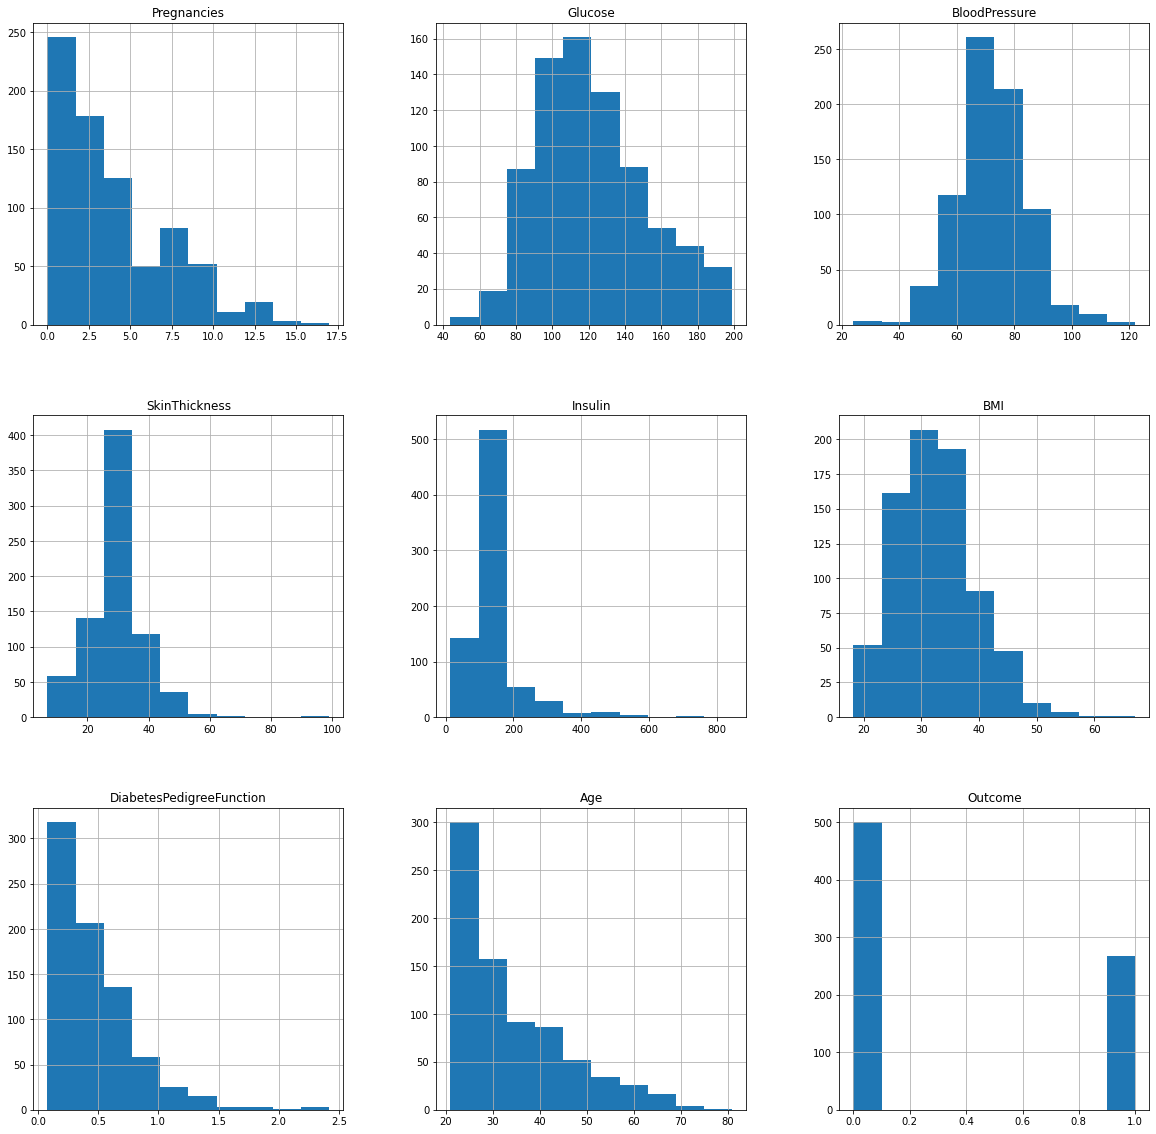

In [21]:
p=df.hist(figsize = (20,20))

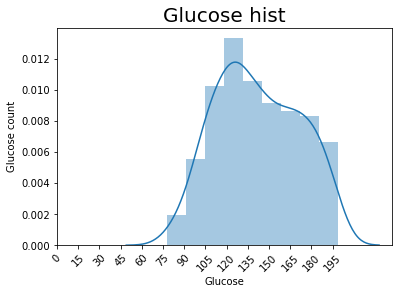

In [23]:
fig = plt.figure(figsize=(6,4))

sns.distplot(df['Glucose'][df['Outcome']==1])
plt.xticks([i for i in range(0,201,15)],rotation=45)
plt.ylabel('Glucose count')
plt.title('Glucose hist',fontsize=20)
plt.show()

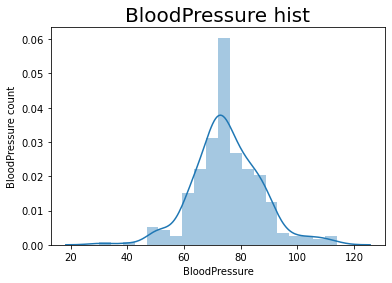

In [24]:
fig = plt.figure(figsize=(6,4))

sns.distplot(df['BloodPressure'][df['Outcome']==1])
plt.xticks()
plt.ylabel('BloodPressure count')
plt.title('BloodPressure hist',fontsize=20)
plt.show()

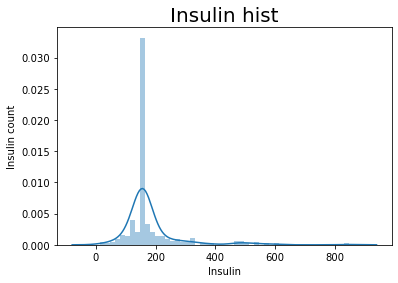

In [25]:
fig = plt.figure(figsize=(6,4))

sns.distplot(df['Insulin'][df['Outcome']==1])
plt.xticks()
plt.ylabel('Insulin count')
plt.title('Insulin hist',fontsize=20)
plt.show()

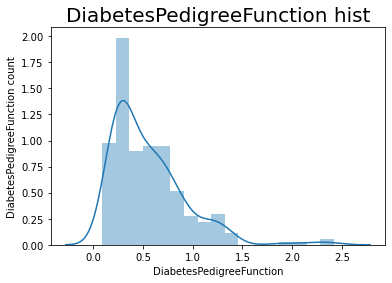

In [26]:
fig = plt.figure(figsize=(6,4))

sns.distplot(df['DiabetesPedigreeFunction'][df['Outcome']==1])
plt.xticks()
plt.ylabel('DiabetesPedigreeFunction count')
plt.title('DiabetesPedigreeFunction hist',fontsize=20)
plt.show()

# 3.Create a Countplot descibing the count of variables

In [28]:
df.dtypes.value_counts()

float64    6
int64      3
dtype: int64

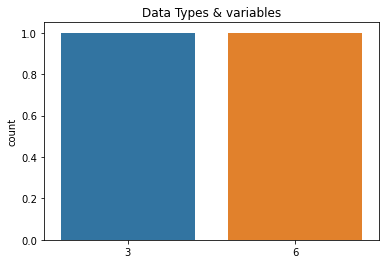

In [29]:
plt.title("Data Types & variables")
sns.countplot(x=df.dtypes.value_counts(),data=df)
plt.show()

Data Exploration:

In [30]:
#Check the balance of the data by plotting the count of outcomes by their value. 
#Describe your findings and plan future course of action.

In [31]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

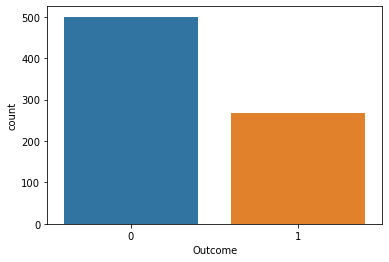

In [32]:
sns.countplot(x='Outcome',data=df)
plt.show()

Create scatter charts between the pair of variables to understand the relationships

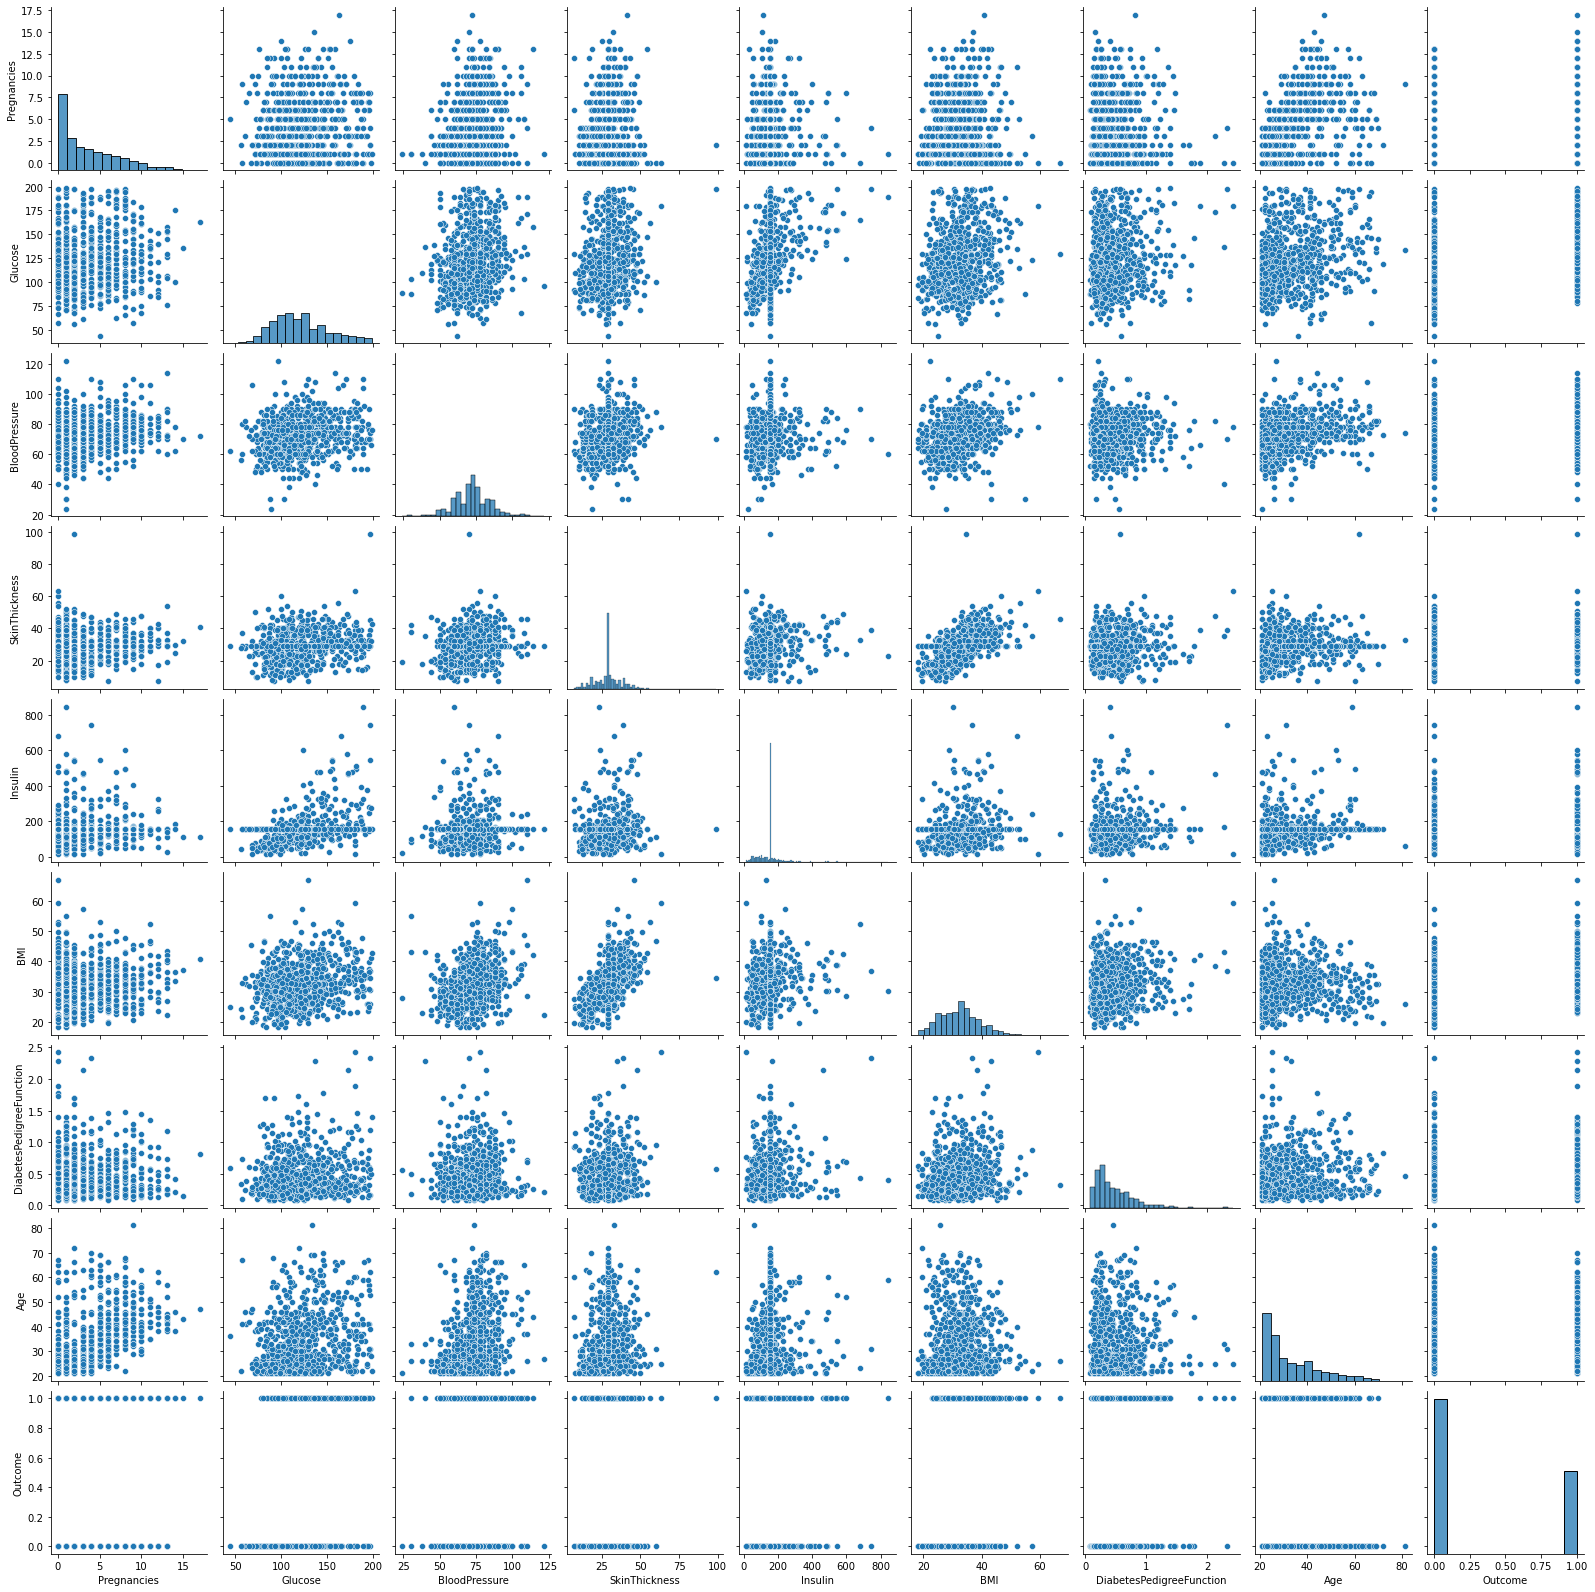

In [33]:
sns.pairplot(df)
plt.show()

Pair plot to know relationship between two variables

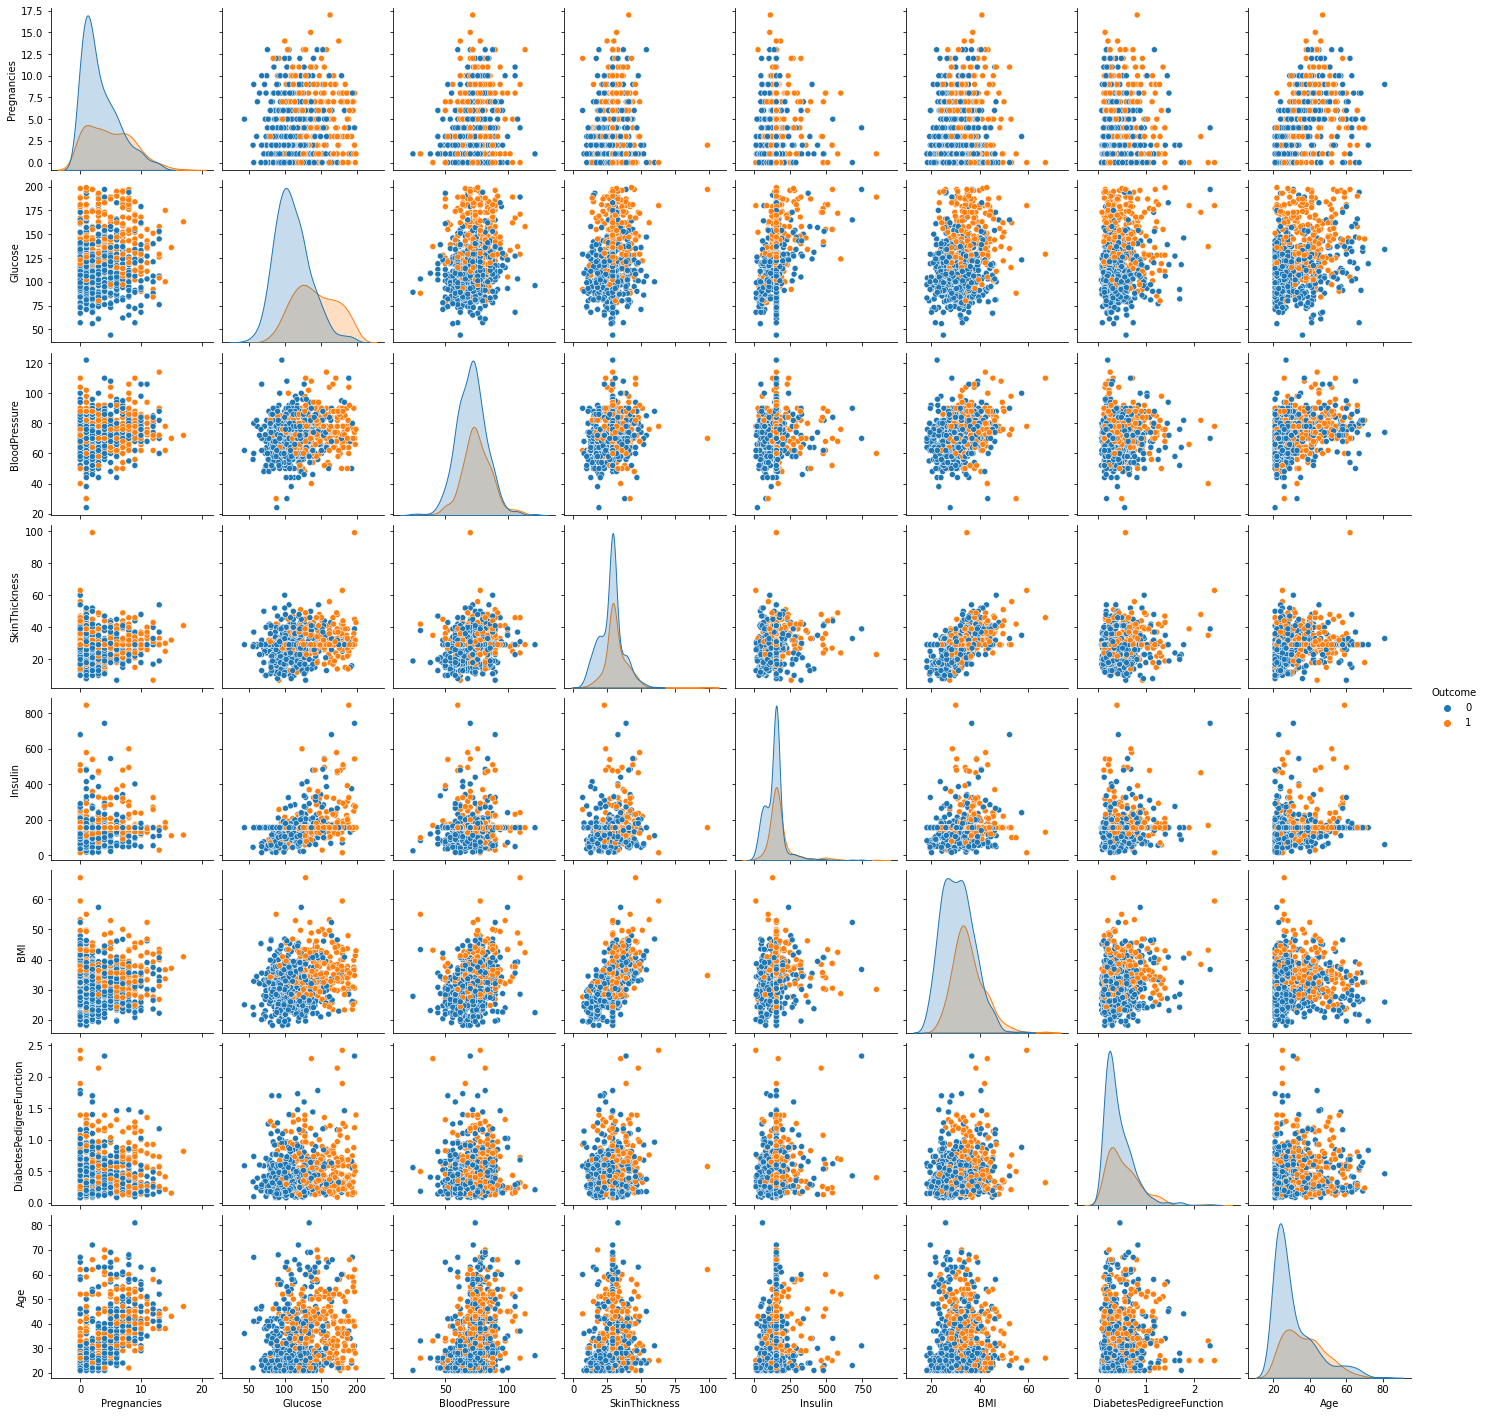

In [34]:
sns.pairplot(df,hue='Outcome')
plt.show()

In [35]:
corr_matrix=df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


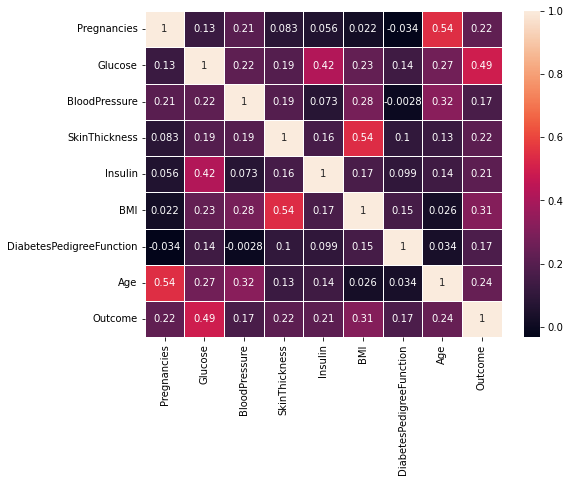

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,linewidths=1)
plt.show()

# Observations or Findings

From the Correlation heatmap & Correlation Matrix we can see that there is strong correlation between "Outcome" and [Glucose,Insulin,BMI,Age] ,so we can select these feature to accept
input from the user and predict the Outcome

The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

This Correlation _matrix shows,there is 24% contribution of "Age" for the outcome,similarly Glucose level contributing highest for outcome i.e 49%.

Conclusion-If the glucose level is high then 49% chance of diabetes.

# Data Modeling:-

Model-1 Logistic Regreation:-

In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [38]:
features=df.iloc[:,[0,1,2,3,4,5,6,7]].values
label = df.iloc[:,8].values

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.20,random_state=10)

In [40]:
model_1=LogisticRegression()
model_1.fit(x_train,y_train)

LogisticRegression()

In [41]:
model_2=DecisionTreeClassifier(max_depth=4)
model_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [42]:
model_3=RandomForestClassifier(n_estimators=4)
model_3.fit(x_train,y_train)

RandomForestClassifier(n_estimators=4)

In [43]:
model_4=SVC(kernel='linear',random_state=4)
model_4.fit(x_train,y_train)

SVC(kernel='linear', random_state=4)

In [44]:
model_5=KNeighborsClassifier(4)
model_5.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

Making Predictions :-

In [45]:
y_predict_logistic=model_1.predict(x_test)
y_predict_decisiontree=model_2.predict(x_test)
y_predict_random=model_3.predict(x_test)
y_predict_svc=model_4.predict(x_test)
y_predict_KNn=model_5.predict(x_test)

Accuracy Evaluation :-

In [46]:
from sklearn.metrics import accuracy_score

accuracy_logistic=accuracy_score(y_test,y_predict_logistic)
accuracy_decisiontree=accuracy_score(y_test,y_predict_decisiontree)
accuracy_random=accuracy_score(y_test,y_predict_random)
accuracy_svc=accuracy_score(y_test,y_predict_svc)
accuracy_KNn=accuracy_score(y_test,y_predict_KNn)

Accuracy Test :-

In [47]:
print('Logistic Regression :', (accuracy_logistic*100))
print('Decision Tree Classifier :', (accuracy_decisiontree*100))
print('RandomForest :', (accuracy_random*100))
print('SVM :', (accuracy_svc*100))
print('KNn :', (accuracy_KNn*100))

Logistic Regression : 72.07792207792207
Decision Tree Classifier : 75.97402597402598
RandomForest : 72.72727272727273
SVM : 72.72727272727273
KNn : 69.48051948051948


"As compared with few algorithm we got highest accuracy as approx , "76%" in Decision Tree Classifier".

# Data Modeling : ROC AUC


Defining the metrics for :- "ROC AUC Curve".

In [49]:
from sklearn.metrics import roc_curve
y_predict_proba=model_5.predict_proba(x_test)[ : : ,1]
fpr,tpr,thresholds = roc_curve(y_test,y_predict_proba)
auc = metrics.roc_auc_score(y_test,y_predict_proba)


Create ROC Curve

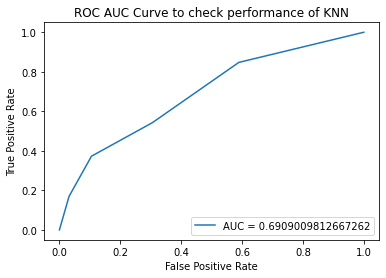

In [50]:
plt.plot(fpr,tpr,label="AUC = "+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC AUC Curve to check performance of KNN")
plt.legend(loc=4)
plt.show()

# Conclusion:-

AUC ROC useful when model is binary classification problem.

Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two in our case AUC Score is 69% ,for good model
AUC must required more than 95%.
